# With Dcross=1e-14, Nyman008, Xi=-1.4; t_0+=0.28, have a closer look at why EC goes to negative for Dec=1e-12 but not 1e-10

In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   ;import numpy as np;import os;import matplotlib.pyplot as plt;import os;
from scipy.io import savemat,loadmat;from pybamm import constants,exp,tanh,sqrt;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
for k in range(0,1):
    mpl.rcParams["axes.labelsize"] = fs
    mpl.rcParams["axes.titlesize"] = fs
    mpl.rcParams["xtick.labelsize"] =  fs
    mpl.rcParams["ytick.labelsize"] =  fs
    mpl.rcParams["legend.fontsize"] =  fs
    mpl.rcParams['font.sans-serif'] = ['Times New Roman']
    mpl.rcParams['font.serif'] = ['Times New Roman']
    mpl.rcParams['axes.unicode_minus'] = False
import traceback
import imageio.v2 as imageio

In [2]:
V_max = 4.2;        V_min = 2.5;
Experiment_RPT   = pybamm.Experiment( [ (
    f"Discharge at 1 C until {V_min} V", 
    f"Charge at 0.3 C until {V_max} V", 
    f"Hold at {V_max} V until C/5")    ] * 1 ) 
Experiment_s   = pybamm.Experiment( [ (
    f"Discharge at 1 C for 240 s", )    ] * 1 )   

In [3]:
BasicPath = 'D:/OneDrive - Imperial College London/SimDataSave/P3R4/'; 
Target  = 'a7_check_Dec/'
if not os.path.exists(BasicPath + Target):
    os.mkdir(BasicPath + Target);

In [4]:
Model_ddiff = pybamm.lithium_ion.DFN(     
    options={"solvent diffusion": "EC wo refill"     } )
ChemistryChen=pybamm.parameter_sets.Chen2020 
ChemistryChen["electrolyte"] = "lipf6_Nyman2008_rio";
Para_0=pybamm.ParameterValues(chemistry=ChemistryChen);
Para_0['EC transference number'] =     -1.4
Para_0['Cation transference number'] =     0.28

Para_0['EC Lithium ion cross diffusivity [m2.s-1]'] = 1e-14
Para_0['Typical EC Lithium ion cross diffusivity [m2.s-1]'] =  1e-14
Para_0['EC diffusivity in electrolyte [m2.s-1]'] =   "[input]" 

c_e_ddiff = Model_ddiff.variables["Electrolyte concentration [mol.m-3]"]
T_ddiff = Model_ddiff.variables["Cell temperature [K]"]
c_EC_ddiff = Model_ddiff.variables["EC concentration [mol.m-3]"]
Model_ddiff.variables["c(EC) over c(Li+)"] = c_EC_ddiff / c_e_ddiff
Model_ddiff.variables["Electrolyte conductivity [S.m-1]"] =(
    Para_0['Electrolyte conductivity [S.m-1]'](c_e_ddiff,c_EC_ddiff, T_ddiff))
Model_ddiff.variables["Electrolyte diffusivity [m2.s-1]"] =(
    Para_0['Electrolyte diffusivity [m2.s-1]'](c_e_ddiff,c_EC_ddiff, T_ddiff))

using EC wo refill for Li+


Xi =  list(np.linspace(-1.8, -1.0, 10))
print(type(Xi))

In [5]:
Sim_ddiff    = pybamm.Simulation(
    Model_ddiff, experiment = Experiment_RPT,
    parameter_values = Para_0,
    solver = pybamm.CasadiSolver(),)  
Sol_Dec1e_12    = Sim_ddiff.solve(
    inputs={
        "EC diffusivity in electrolyte [m2.s-1]":1e-12,});
Sol_Dec1e_10    = Sim_ddiff.solve(
    inputs={
        "EC diffusivity in electrolyte [m2.s-1]":1e-10,});

print(Sol_ddiff["Electrolyte conductivity [S.m-1]"].entries[:,51] )
print(Sol_ddiff["Electrolyte diffusivity [m2.s-1]"].entries[:,-1])

In [15]:
font = {'family' : 'Times New Roman','size': 18}
mpl.rc('font', **font)

In [17]:
label = ["Dec=1e-12","Dec=1e-10",] 
output_variables3 = [
    "Terminal voltage [V]",   
    "EC concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]",
    "c(EC) over c(Li+)",
    "Electrolyte conductivity [S.m-1]",
    "Electrolyte diffusivity [m2.s-1]",
]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_12,Sol_Dec1e_10
    ], output_variables3,
    variable_limits='fixed',time_unit='hours',n_rows=2,
    figsize = (16,10)) #     spatial_unit='mm',
quick_plot.dynamic_plot();

interactive(children=(FloatSlider(value=0.0, description='t', max=4.136026038836274, step=0.04136026038836274)…

In [37]:
label = ["Dec=1e-12","Dec=1e-10",] 
output_variables3 = [
    "Terminal voltage [V]",   
    "EC concentration [mol.m-3]",
    "EC flux [mol.m-2.s-1]",
    "EC flux by diffusion [mol.m-2.s-1]",
    "EC flux by migration [mol.m-2.s-1]",
    "EC flux by Li+ [mol.m-2.s-1]",
]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_12,Sol_Dec1e_10
    ], output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (16,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();


interactive(children=(FloatSlider(value=0.0, description='t', max=4.136026038836274, step=0.04136026038836274)…

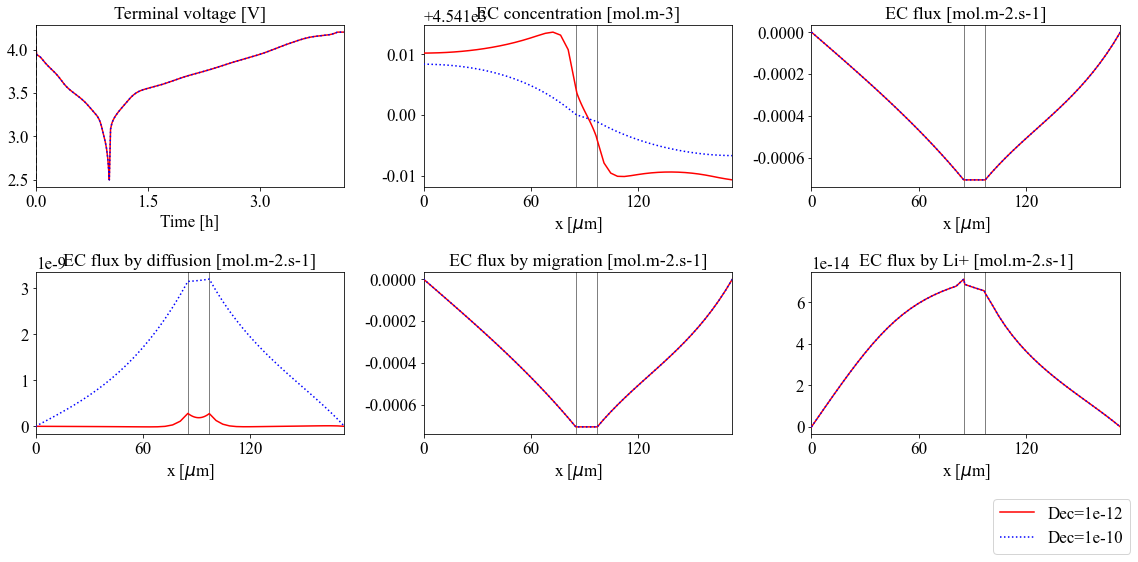

In [35]:
label = ["Dec=1e-12","Dec=1e-10",] 
output_variables3 = [
    "Terminal voltage [V]",   
    "EC concentration [mol.m-3]",
    "EC flux [mol.m-2.s-1]",
    "EC flux by diffusion [mol.m-2.s-1]",
    "EC flux by migration [mol.m-2.s-1]",
    "EC flux by Li+ [mol.m-2.s-1]",
]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_12,Sol_Dec1e_10
    ], output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (16,8)) #     spatial_unit='mm',
#quick_plot.dynamic_plot();
quick_plot.plot(1e-7)

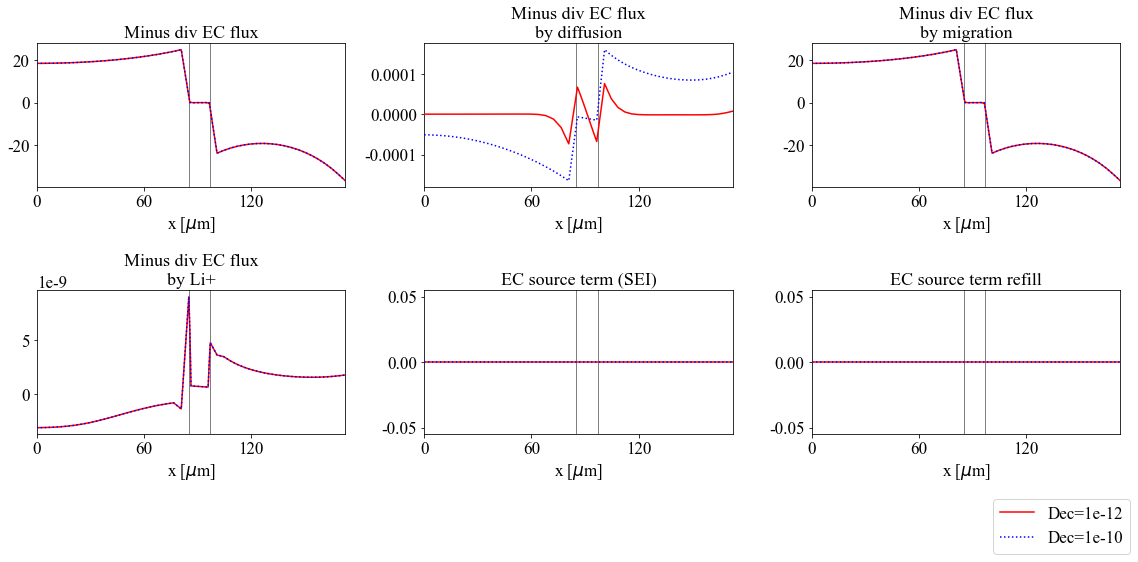

In [36]:
label = ["Dec=1e-12","Dec=1e-10",] 
output_variables3 = [
    "Minus div EC flux",
    "Minus div EC flux by diffusion",
    "Minus div EC flux by migration",
    "Minus div EC flux by Li+",
    "EC source term (SEI)",
    "EC source term refill",
]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_12,Sol_Dec1e_10
    ], output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (16,8)) #     spatial_unit='mm',
#quick_plot.dynamic_plot();
quick_plot.plot(1e-7)

In [31]:
label = ["Dec=1e-10",] 
output_variables3 = [
    "Terminal voltage [V]",   
    "EC concentration [mol.m-3]",
    "EC flux [mol.m-2.s-1]",
    "EC flux by diffusion [mol.m-2.s-1]",
    "EC flux by migration [mol.m-2.s-1]",
    "EC flux by Li+ [mol.m-2.s-1]",
]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_10
    ], output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (16,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();

interactive(children=(FloatSlider(value=0.0, description='t', max=4.135966755811628, step=0.041359667558116285…

In [32]:
label = ["Dec=1e-12"] 
output_variables3 = [
    "Terminal voltage [V]",   
    "EC concentration [mol.m-3]",
    "EC flux [mol.m-2.s-1]",
    "EC flux by diffusion [mol.m-2.s-1]",
    "EC flux by migration [mol.m-2.s-1]",
    "EC flux by Li+ [mol.m-2.s-1]",
]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_12
    ], output_variables3,label,
    variable_limits='tight',time_unit='hours',n_rows=2,
    figsize = (16,8)) #     spatial_unit='mm',
quick_plot.dynamic_plot();

interactive(children=(FloatSlider(value=0.0, description='t', max=4.136026038836274, step=0.04136026038836274)…

In [21]:
label = ["Dec=1e-12","Dec=1e-10",] 
output_variables3 = [
    "Li+ flux [mol.m-2.s-1]",
    "EC flux [mol.m-2.s-1]",
    [
        "Minus div EC flux",
        "Minus div EC flux by diffusion",
        "Minus div EC flux by migration",
        "Minus div EC flux by Li+"
    ],
    "EC source term (SEI)",
    "EC source term refill",
    [
        "Minus div Li+ flux",
        "Minus div Li+ flux by diffusion",
        "Minus div Li+ flux by migration",
        "Minus div Li+ flux by solvent"
    ],
    "Li+ source term",
    "Li+ source term refill",

]
quick_plot = pybamm.QuickPlot([
    Sol_Dec1e_12,Sol_Dec1e_10
    ], output_variables3,label,
    variable_limits='fixed',time_unit='hours',n_rows=3,
    figsize = (16,12)) #     spatial_unit='mm',figsize = (12,8)
quick_plot.dynamic_plot();

interactive(children=(FloatSlider(value=0.0, description='t', max=4.136026038836274, step=0.04136026038836274)…